<a href="https://colab.research.google.com/github/mdhasanali3/3d-model-yolov5/blob/main/product_b_3d_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
from IPython.display import Image, clear_output  # to display images
display = utils.notebook_init()  # checks

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/78.2 GB disk)
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [2]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9u8e8t")
project = rf.workspace("3d-model-realworld-evalution").project("product-b")
dataset = project.version(1).download("yolov5")


/content/yolov5
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 178 kB 70.7 MB/s 
     |████████████████████████████████| 138 kB 72.5 MB/s 
     |████████████████████████████████| 145 kB 80.4 MB/s 
     |████████████████████████████████| 1.1 MB 66.5 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d1d8eb4f1d8f66a24a0dc2c844c078772bbee148019322b5ade1a5c86c8e6d3a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.7
    Uninstalling pyparsing-3.0.7:
      Successfully uninstalled pyparsing-3.0.7
  Attempting uninstall: kiwisolver
    Foun

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to product-B-1 in yolov5pytorch:: 100%|██████████| 438/438 [00:00<00:00, 1818.42it/s]


In [3]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- pb1
- pb2
- pb3
nc: 3
train: product-B-1/train/images
val: product-B-1/valid/images


In [4]:
!python train.py --img 640 --batch 64 --epochs 110 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/product-B-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=110, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0,

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/product-B-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/yolov5/product-B-1/test/images/pb2--13-_png.rf.14c9f9bdf8316727a3f65c6f62070e51.jpg: 640x640 1 pb2, Done. (0.016s)
image 2/8 /content/yolov5/product-B-1/test/images/pb2--25-_png.rf.46aa79d05388f4847f338de21ab39d46.jpg: 640x640 1 pb1, Done. (0.017s)
image 3/8 /content/yolov5/product-B-1/test/images/pb2--27-_png.rf.492eaa51a6b3af87dbc197

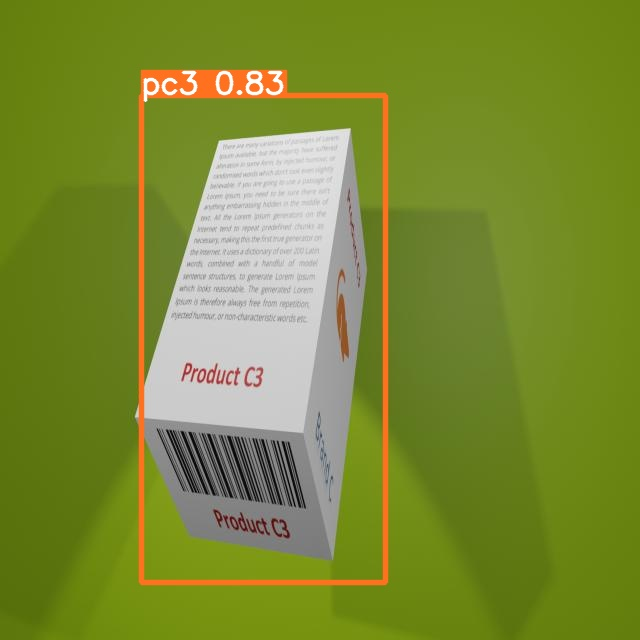

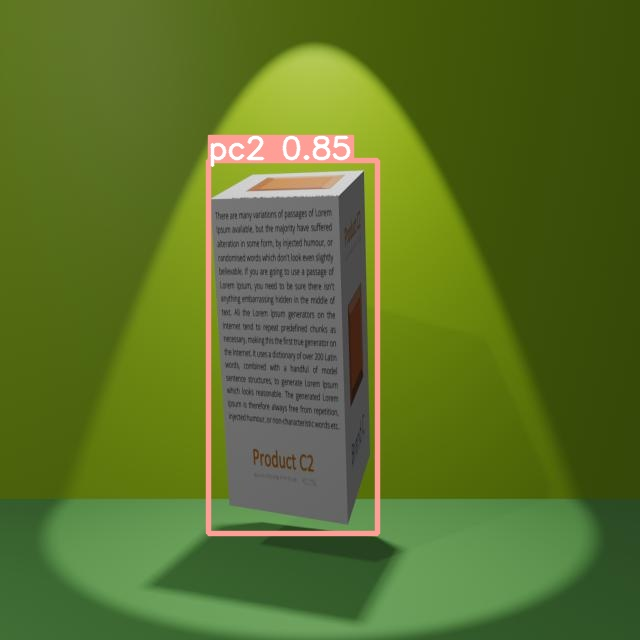

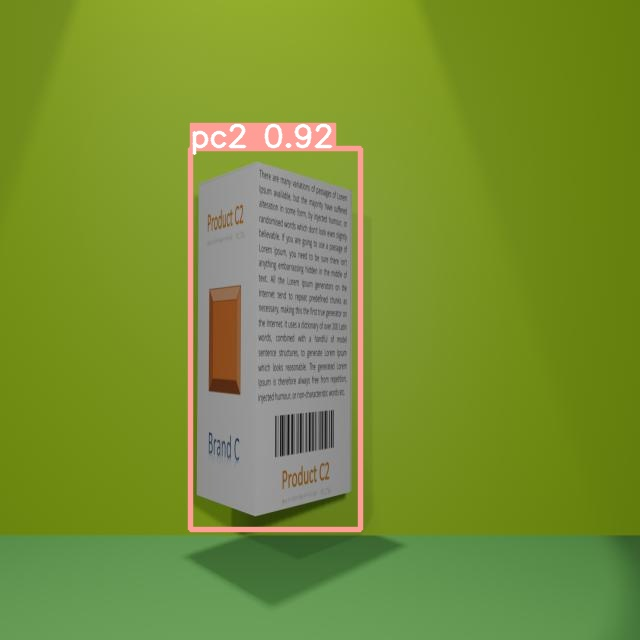

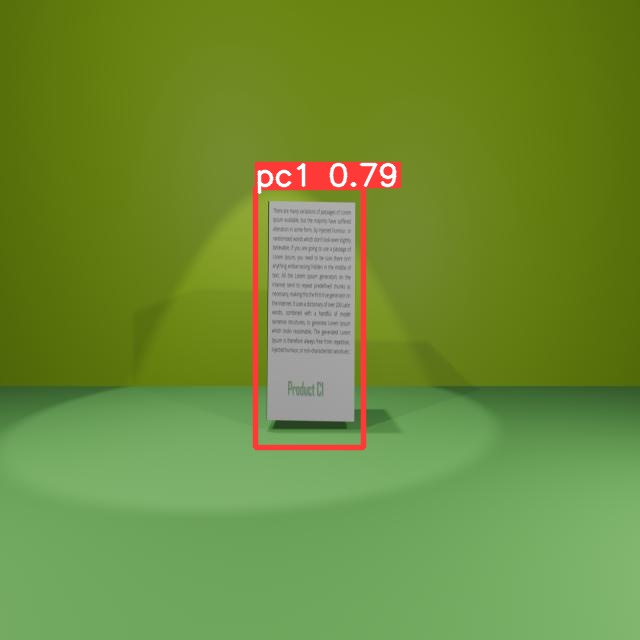

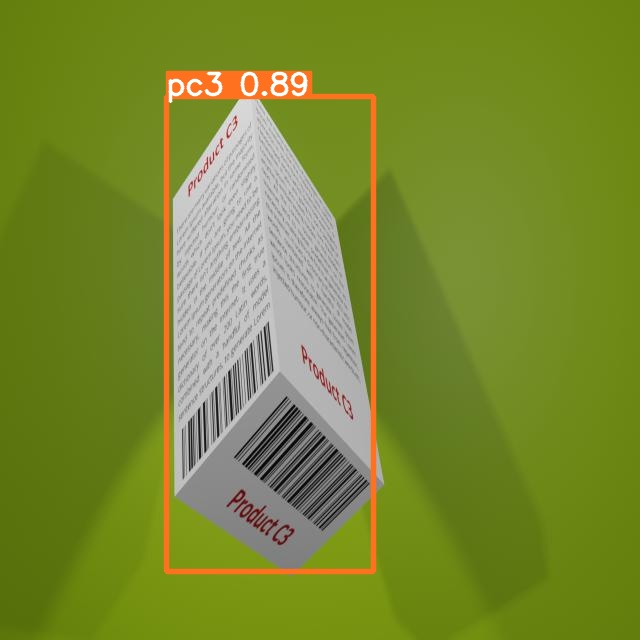

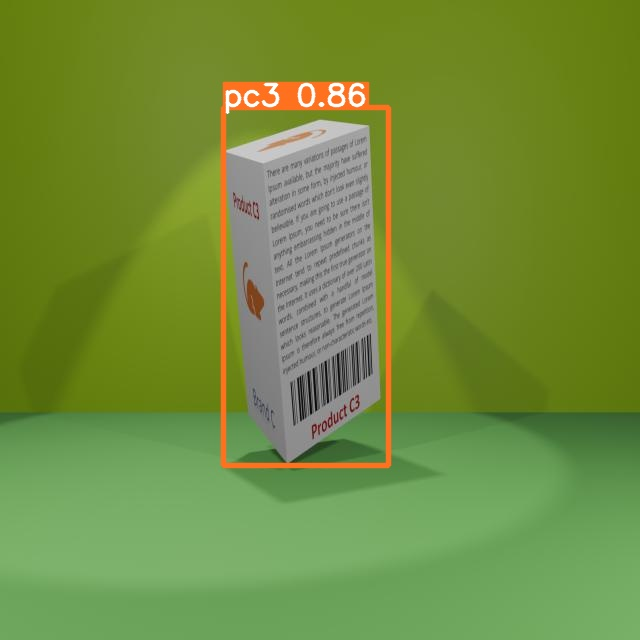

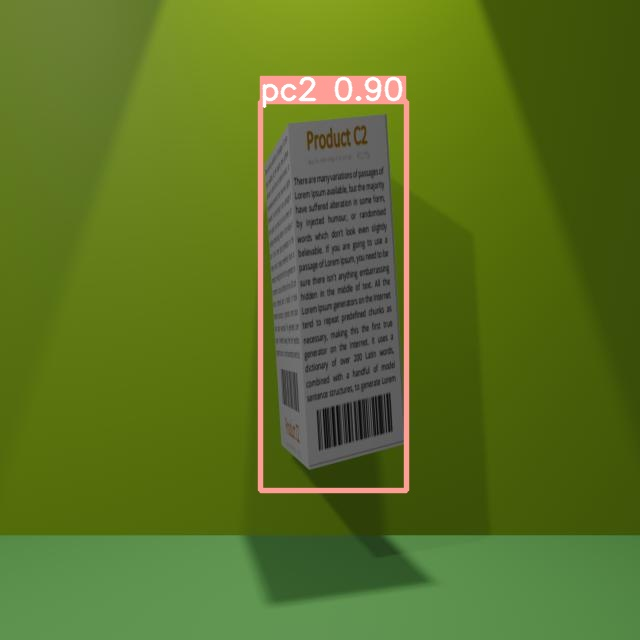

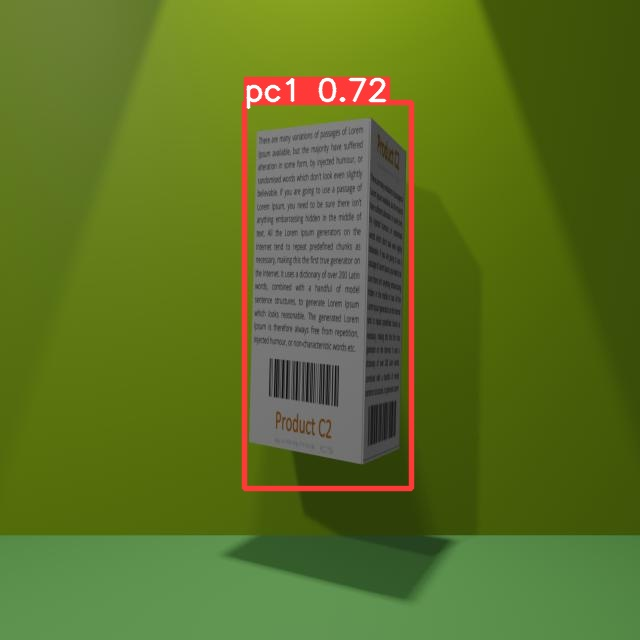

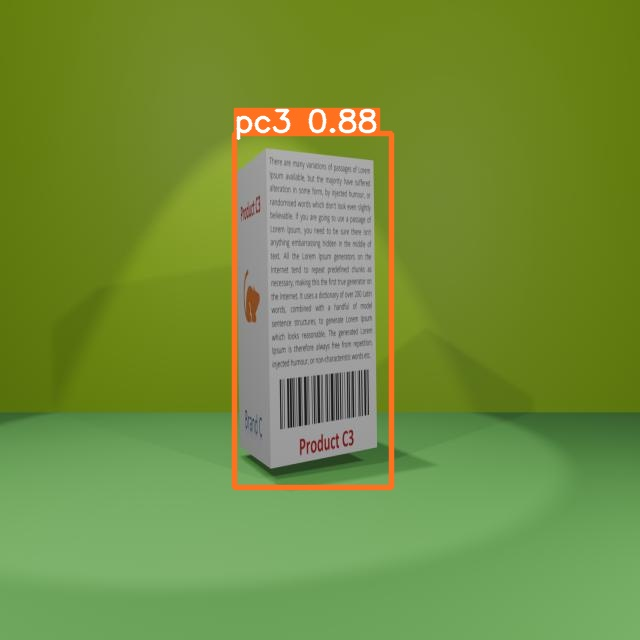

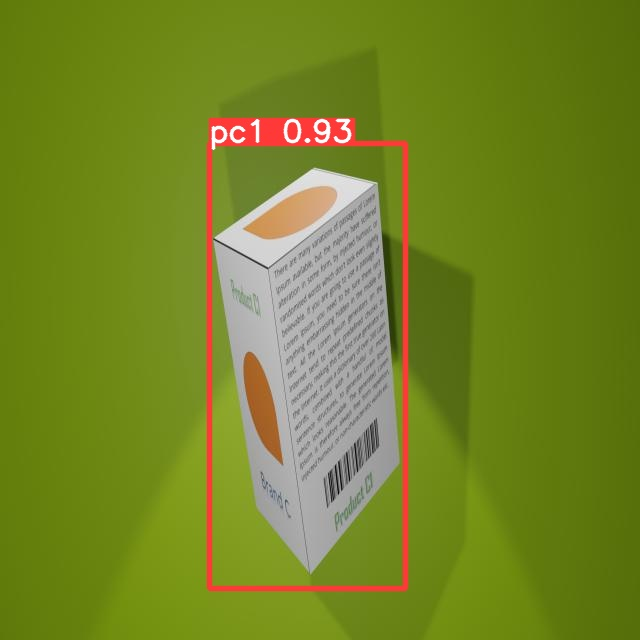

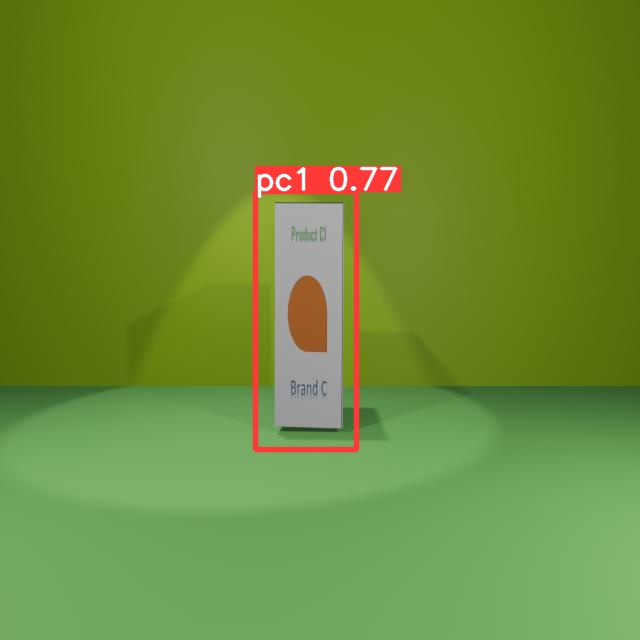

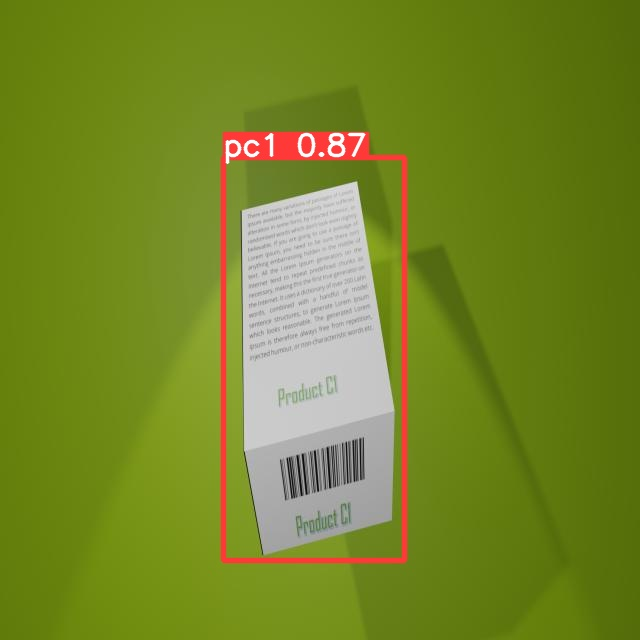

In [6]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [6]:
!python export.py --weights /content/yolov5/runs/train/exp/weights/best.pt --include tfjs

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tfjs']
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp/weights/best.pt with output shape (1, 25200, 8) (14.5 MB)

TensorFlow SavedModel: starting export with tensorflow 2.8.0...

                 from  n    params  module                                  arguments                     
2022-03-02 09:41:26.536889: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  1

In [37]:
cd ../..

/content


In [7]:
! git clone https://github.com/mdhasanali3/3d-model-yolov5.git


Cloning into '3d-model-yolov5'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 37 (delta 5), reused 24 (delta 1), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [8]:
!git config --global user.email "hasan48@student.sust.edu"
!git config --global user.name "mdhasanali3"

In [11]:
!git pull origin

Already up to date.


In [14]:
pwd

'/content/yolov5'

In [16]:
%cd /content/yolov5/3d-model-yolov5

/content/yolov5/3d-model-yolov5


In [18]:
%mkdir product_B_64b_110e


In [19]:
%cp -r /content/yolov5/runs/train/exp/weights/best.pt /content/yolov5/3d-model-yolov5/product_B_64b_110e
%cp -r /content/yolov5/runs/train/exp/weights/best_web_model /content/yolov5/3d-model-yolov5/product_B_64b_110e 

In [13]:
pwd

'/content/yolov5'

In [20]:
!git status


On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	product_B_64b_110e/

nothing added to commit but untracked files present (use "git add" to track)


In [21]:
!git add -A


In [22]:
!git commit -m "product B model"

[main c2eec1a] product B model
 9 files changed, 1 insertion(+)
 create mode 100644 product_B_64b_110e/best.pt
 create mode 100644 product_B_64b_110e/best_web_model/group1-shard1of7.bin
 create mode 100644 product_B_64b_110e/best_web_model/group1-shard2of7.bin
 create mode 100644 product_B_64b_110e/best_web_model/group1-shard3of7.bin
 create mode 100644 product_B_64b_110e/best_web_model/group1-shard4of7.bin
 create mode 100644 product_B_64b_110e/best_web_model/group1-shard5of7.bin
 create mode 100644 product_B_64b_110e/best_web_model/group1-shard6of7.bin
 create mode 100644 product_B_64b_110e/best_web_model/group1-shard7of7.bin
 create mode 100644 product_B_64b_110e/best_web_model/model.json


In [ ]:
!git remote -v


In [38]:
!git remote rm origin 

In [39]:
!git remote add origin https://ghHSfi0@github.com/mdhasanali3/3d-model-yolov5.git

In [41]:
!git push -u origin main

Counting objects: 13, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (13/13), done.
Writing objects: 100% (13/13), 37.49 MiB | 12.15 MiB/s, done.
Total 13 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/mdhasanali3/3d-model-yolov5.git
   cf1e87f..c2eec1a  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.
